In [1]:
import os
import pandas as pd 
import numpy as np

import missingno as msno

import utils

In [2]:
wh_df_2022 = pd.read_csv('data/2022.csv').iloc[:-1,1:]

In [3]:
wh_df_2022.head()


,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [4]:
wh_df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country                                     146 non-null    object
 1   Happiness score                             146 non-null    object
 2   Whisker-high                                146 non-null    object
 3   Whisker-low                                 146 non-null    object
 4   Dystopia (1.83) + residual                  146 non-null    object
 5   Explained by: GDP per capita                146 non-null    object
 6   Explained by: Social support                146 non-null    object
 7   Explained by: Healthy life expectancy       146 non-null    object
 8   Explained by: Freedom to make life choices  146 non-null    object
 9   Explained by: Generosity                    146 non-null    object
 10  Explained by: Perceptions 

In [5]:
wh_df_2022.columns[1:]

Index(['Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [6]:
for column in wh_df_2022.columns[1:]:
    wh_df_2022[column] = wh_df_2022[column].str.replace(',', '.')
    wh_df_2022[column] = pd.to_numeric(wh_df_2022[column])

In [7]:
wh_df_2022[['Country', 'Happiness score']].head(20)


,Country,Happiness score
0,Finland,7.821
1,Denmark,7.636
2,Iceland,7.557
3,Switzerland,7.512
4,Netherlands,7.415
5,Luxembourg,7.404
6,Sweden,7.384
7,Norway,7.365
8,Israel,7.364
9,New Zealand,7.200


#### Top 10 happiest countries

In [8]:
utils.plot_happiness_score(wh_df_2022,'Happiness score', 'Country', 10, 2022)

#### Least 10 happiest countries 

In [9]:
utils.plot_happiness_score(wh_df_2022.iloc[-10:,:],'Happiness score', 'Country', 10, 2022)

/Users/eugeneolkhovik/Desktop/master/reproducible_research/project/RR_world_happiness/utils/plot_utils.py:104: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



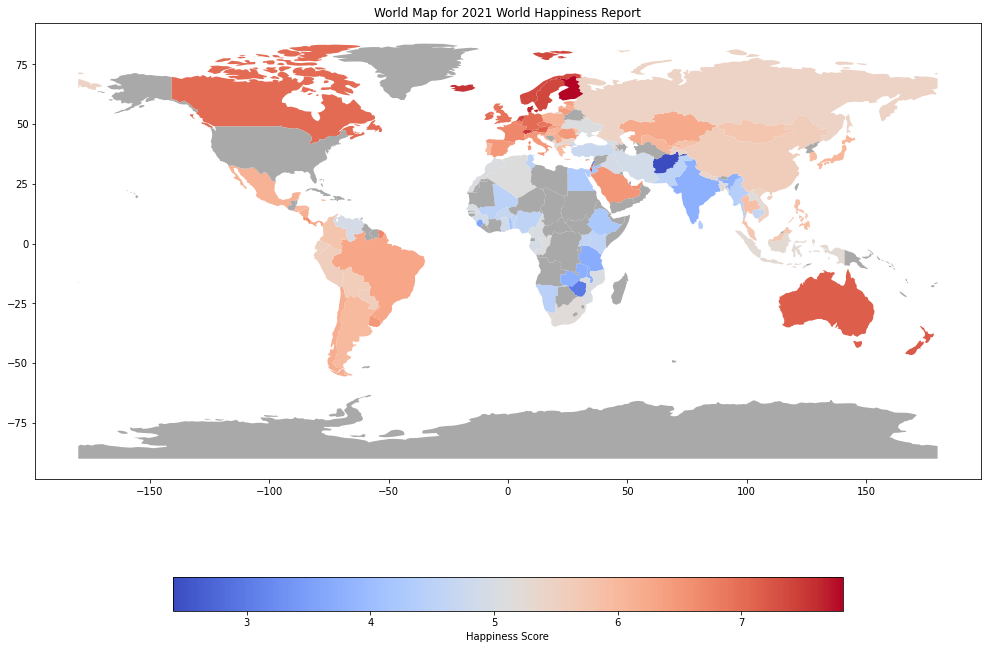

In [10]:
utils.plot_happiness_map(wh_df_2022, 'Happiness score', 'Country')